# TODOS
- accuracy = 75% with KNN, SMOTE, try to improve it
- make KNN fully using spark
- more insights
- better cleaning
- how to use results
- Naive Bayes with spark, discritize features
- better resampling methods
- try to use spark for the whole project

# Pipeline:
 1. Data Exploration
 1. Data Cleaning
 1. Model Building
 1. Model Evaluation

In [1]:
%pip install pyspark
%pip install findspark

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark
import os
import seaborn as sns
import matplotlib.pyplot as plt

import findspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
findspark.init()

In [3]:
spark=SparkSession.builder\
    .master("local[*]")\
    .appName("Rain")\
    .getOrCreate()
sc = spark.sparkContext

23/04/26 18:46:26 WARN Utils: Your hostname, akram-H410M-S2H resolves to a loopback address: 127.0.1.1; using 172.17.0.1 instead (on interface docker0)
23/04/26 18:46:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/04/26 18:46:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/04/26 18:46:32 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


# Data Exploration

In [4]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Null values percentage
(df.isnull().sum()/len(df)*100).to_frame('Null Values %').sort_values('Null Values %', ascending=False)

,Null Values %
Sunshine,48.009762
Evaporation,43.166506
Cloud3pm,40.807095
Cloud9am,38.421559
Pressure9am,10.356799
Pressure3pm,10.331363
WindDir9am,7.263853
WindGustDir,7.098859
WindGustSpeed,7.055548
Humidity3pm,3.098446


In [7]:
# categorical columns
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [8]:
# count of unique values in categorical columns
categorical_columns.nunique().to_frame('Unique Values Count').sort_values('Unique Values Count', ascending=False)


,Unique Values Count
Date,3436
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


In [9]:
# numerical columns 
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [10]:
# count of unique values in numerical columns
numerical_columns.nunique().to_frame('Unique Values Count').sort_values('Unique Values Count', ascending=False)


,Unique Values Count
Rainfall,681
Pressure3pm,549
Pressure9am,546
MaxTemp,505
Temp3pm,502
Temp9am,441
MinTemp,389
Evaporation,358
Sunshine,145
Humidity9am,101


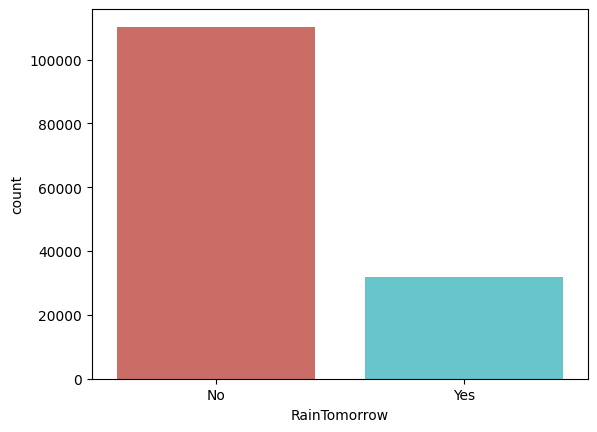

In [11]:
sns.countplot(x='RainTomorrow', data=df, palette='hls')
plt.show()


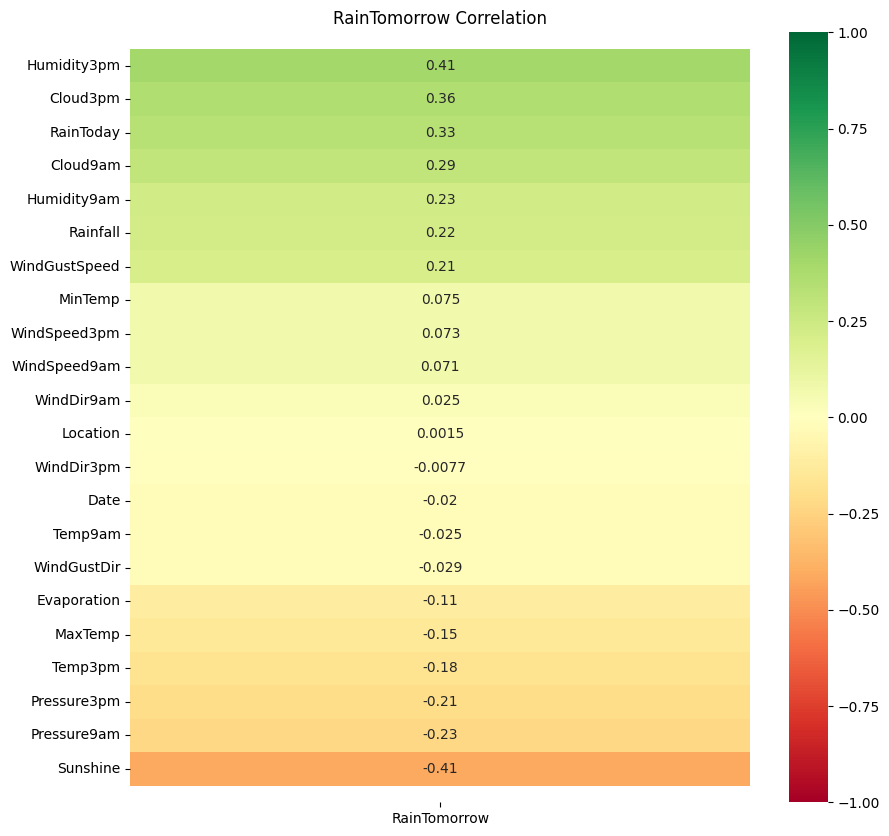

In [12]:
# seaborn correlation matrix
# convert categorical columns to codes using pandas factorize
df2 = df.copy()
# for col in df2.columns:
#     df2[col] = pd.factorize(df2[col])[0]
df2[categorical_columns.columns] = df2[categorical_columns.columns].apply(lambda x: pd.factorize(x)[0])

corr = df2.corr()

plt.figure(figsize=(10, 10))
RainTomorrow_corr = corr[['RainTomorrow']].sort_values(by=['RainTomorrow'], ascending=False).drop('RainTomorrow')

# ax = sns.heatmap(RainTomorrow_corr, annot=True, cmap='Greens')
# make heatmap dark green to red
ax = sns.heatmap(RainTomorrow_corr, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

ax.set_title('RainTomorrow Correlation')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# make heatmap bigger
plt.show()



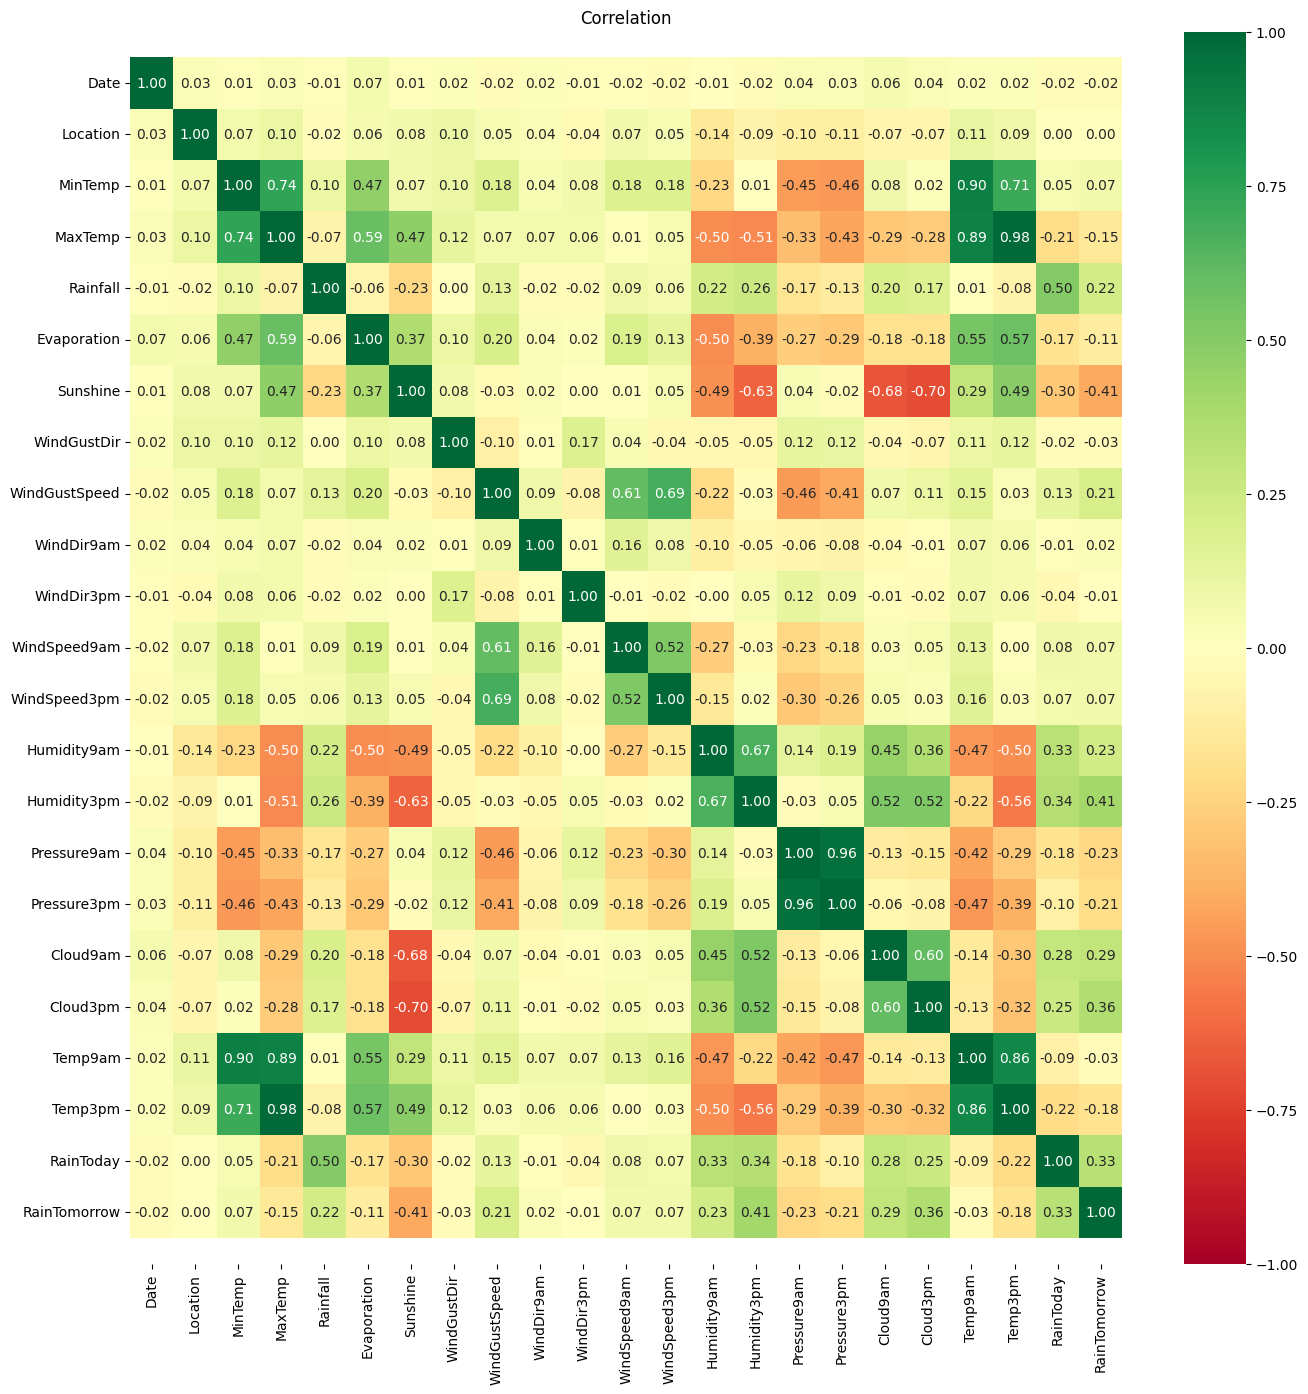

In [13]:
# show the correlation matrix with seaborn
plt.figure(figsize=(16, 16))
ax = sns.heatmap(corr, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt='.2f')
ax.set_title('Correlation')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


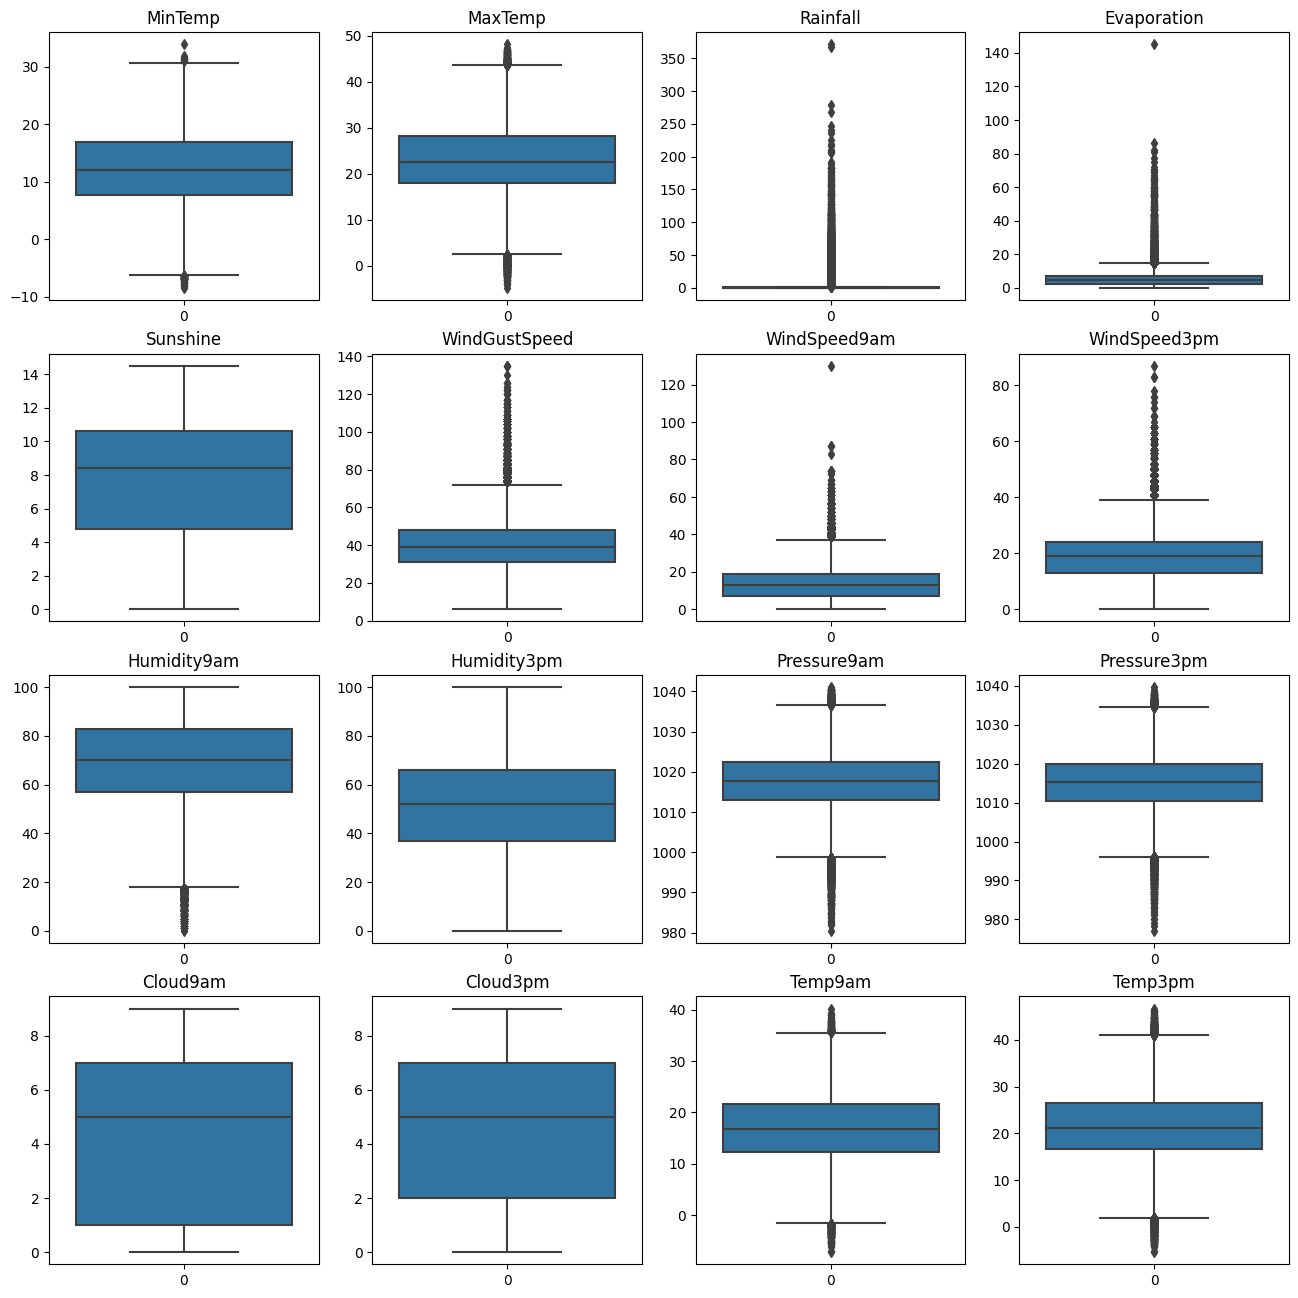

In [14]:
# outliers for all numerical columns
plt.figure(figsize=(16, 16))
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.show()



In [15]:
# outliers percentage for all numerical columns as df
outliers_percentage = pd.DataFrame(columns=['Outliers %'])
for col in numerical_columns.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers_percentage.loc[col] = len(df[(df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))]) / len(df) * 100
outliers_percentage.sort_values('Outliers %', ascending=False)


,Outliers %
Rainfall,17.584216
WindGustSpeed,2.125670
WindSpeed3pm,1.734497
Evaporation,1.371511
WindSpeed9am,1.249141
Humidity9am,0.979651
Pressure9am,0.818782
Pressure3pm,0.631789
Temp3pm,0.525230
MaxTemp,0.336175


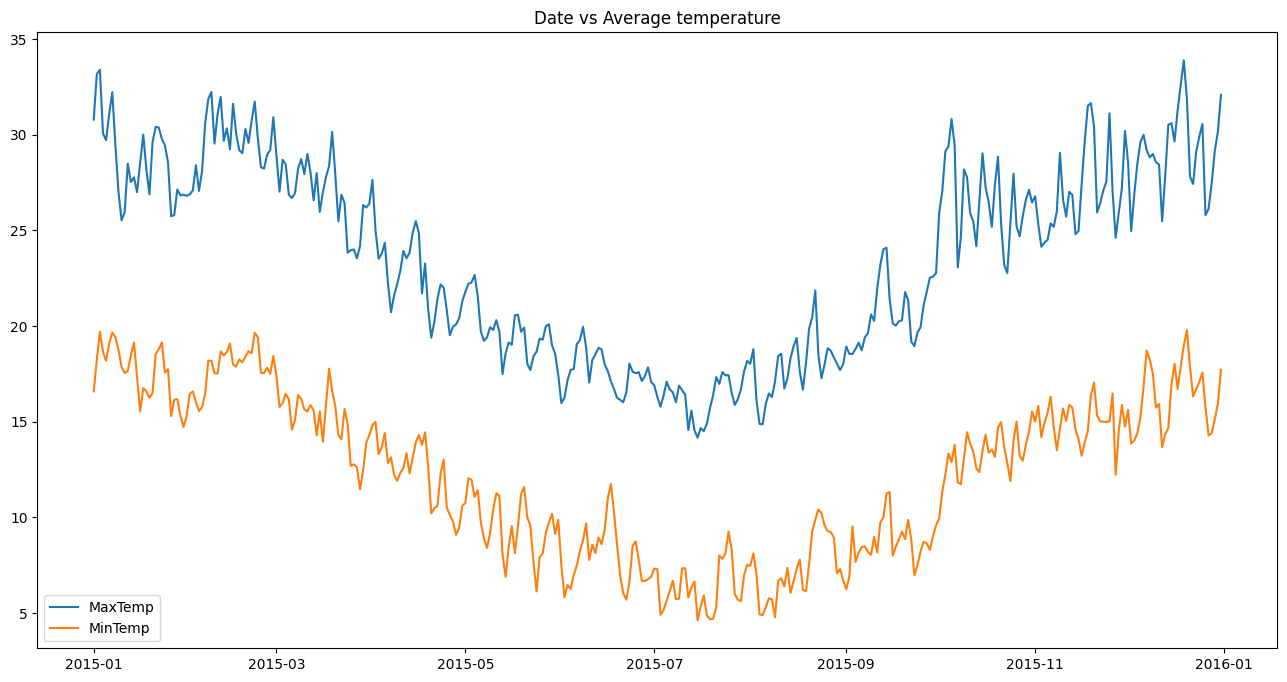

In [16]:
# plot date vs maxtemp
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')
# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]
# choose only average of maxtemp for each day
df2 = df2.groupby('Date').mean(['MaxTemp']).reset_index()

plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['MaxTemp'])
# show MinTemp
plt.plot(df2['Date'], df2['MinTemp'])
plt.legend(['MaxTemp', 'MinTemp'])

plt.title('Date vs Average temperature')
plt.show()



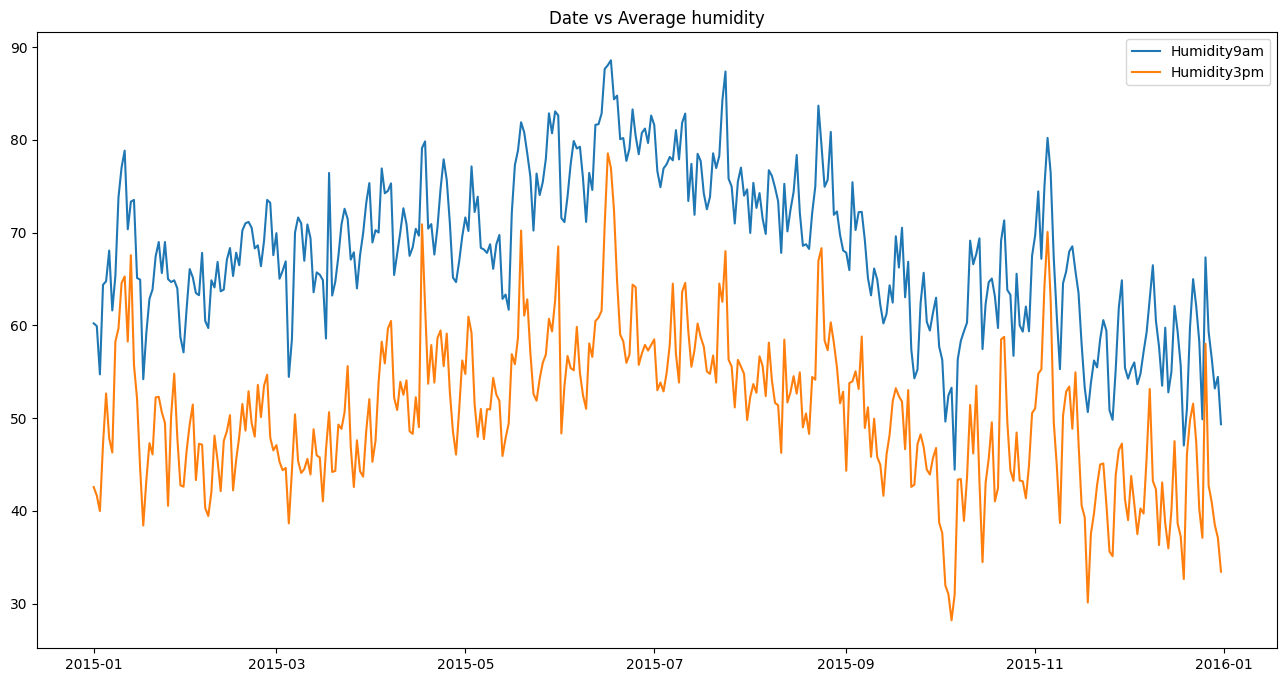

In [17]:
# date vs humidity
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')
# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]
# choose only average of maxtemp for each day
df2 = df2.groupby('Date').mean(['Humidity9am', 'Humidity3pm']).reset_index()

plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['Humidity9am'])
plt.plot(df2['Date'], df2['Humidity3pm'])
plt.legend(['Humidity9am', 'Humidity3pm'])

plt.title('Date vs Average humidity')
plt.show()


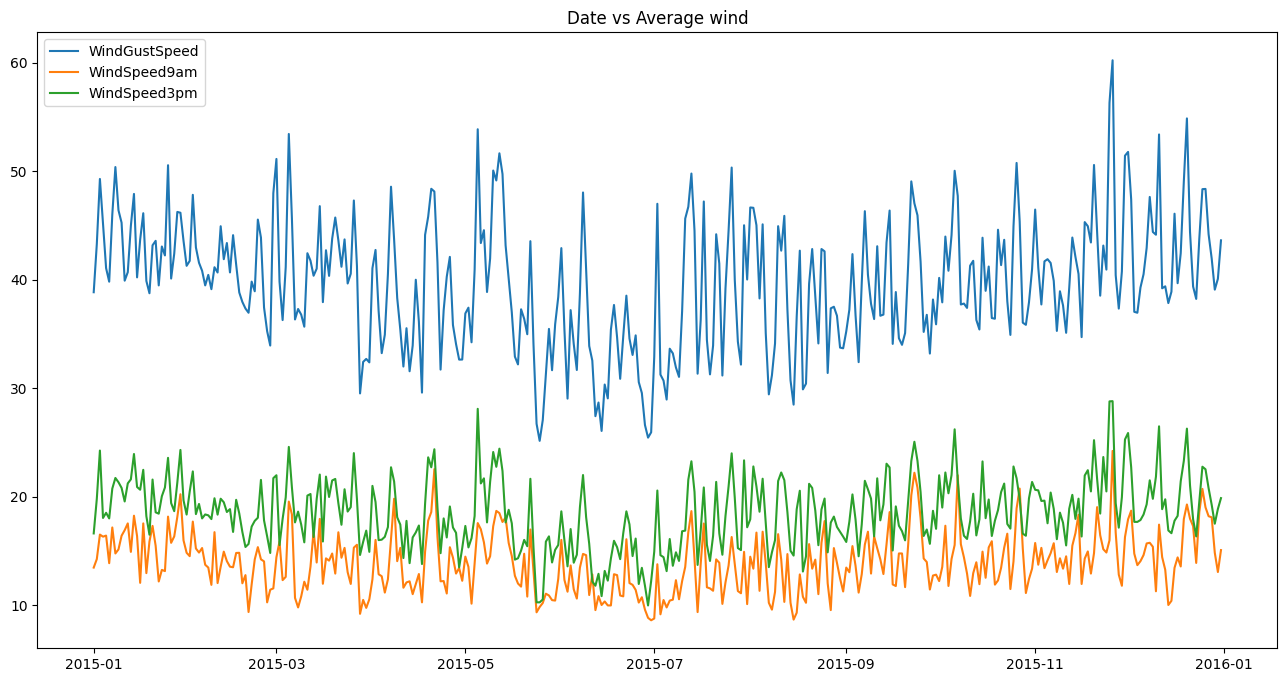

In [18]:
# date vs wind
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')
# choose only 2015
df2 = df2[df2['Date'].dt.year == 2015]
# choose only average of windspeed
df2 = df2.groupby('Date').mean(['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']).reset_index()


plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['WindGustSpeed'])
plt.plot(df2['Date'], df2['WindSpeed9am'])
plt.plot(df2['Date'], df2['WindSpeed3pm'])
plt.legend(['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'])

plt.title('Date vs Average wind')
plt.show()
# meaning of wind gust speed: https://www.weather.gov/safety/wind-chill-frostbite

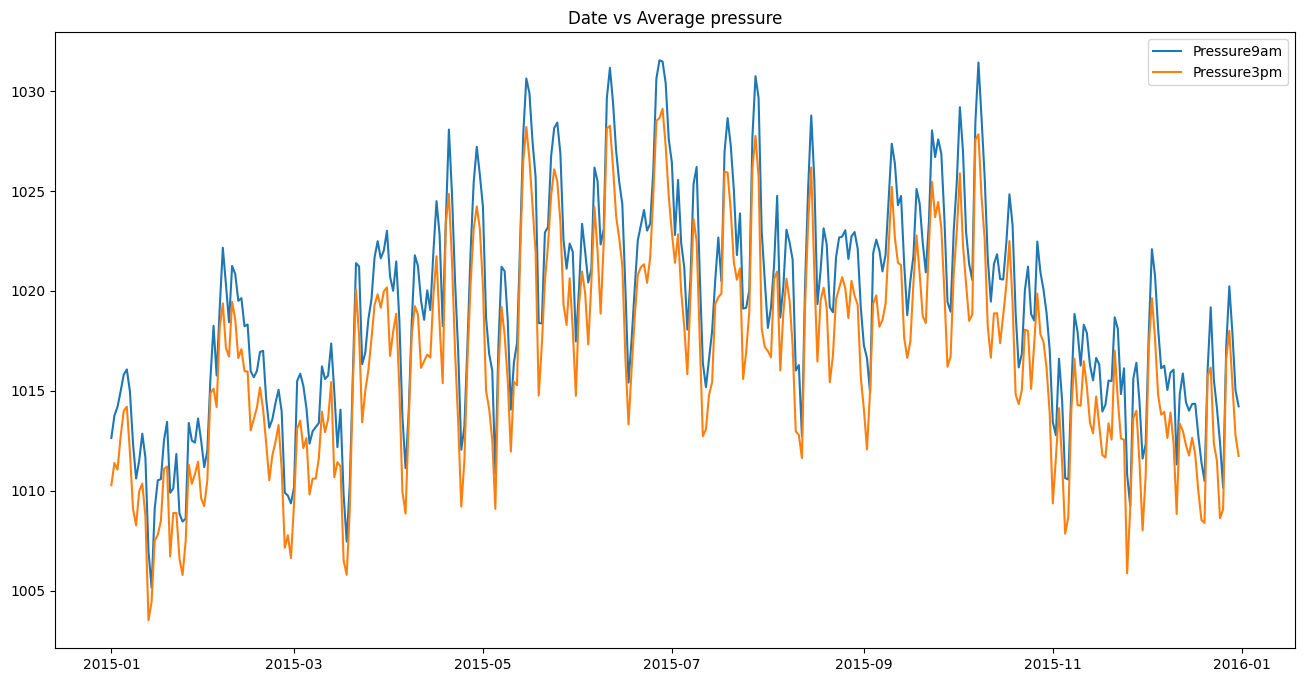

In [19]:
# date vs pressure
plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2['Pressure9am'])
plt.plot(df2['Date'], df2['Pressure3pm'])
plt.legend(['Pressure9am', 'Pressure3pm'])

plt.title('Date vs Average pressure')
plt.show()


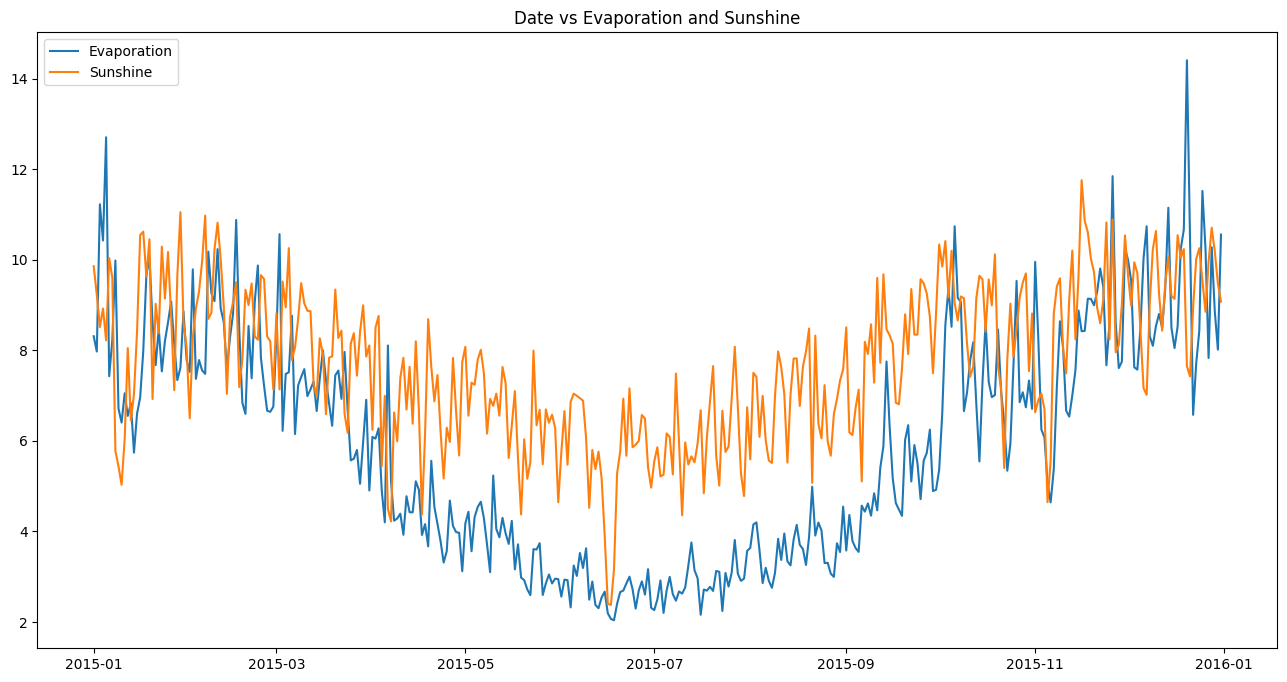

In [20]:
# date vs rain in sydney
# df2 = df.copy()
# df2 = df2[df2['Location'] == 'Darwin']

# df2['Date'] = pd.to_datetime(df2['Date'])
# df2 = df2[df2['Date'].dt.year == 2015]
# df2 = df2.groupby('Date').mean(['Rainfall', 'Evaporation', 'Sunshine']).reset_index()
plt.figure(figsize=(16, 8))
# plt.plot(df2['Date'], df2['Rainfall'])
plt.plot(df2['Date'], df2['Evaporation'])
plt.plot(df2['Date'], df2['Sunshine'])
plt.legend(['Rainfall', 'Evaporation', 'Sunshine'])
plt.legend([ 'Evaporation', 'Sunshine'])

plt.title('Date vs Evaporation and Sunshine')
plt.show()



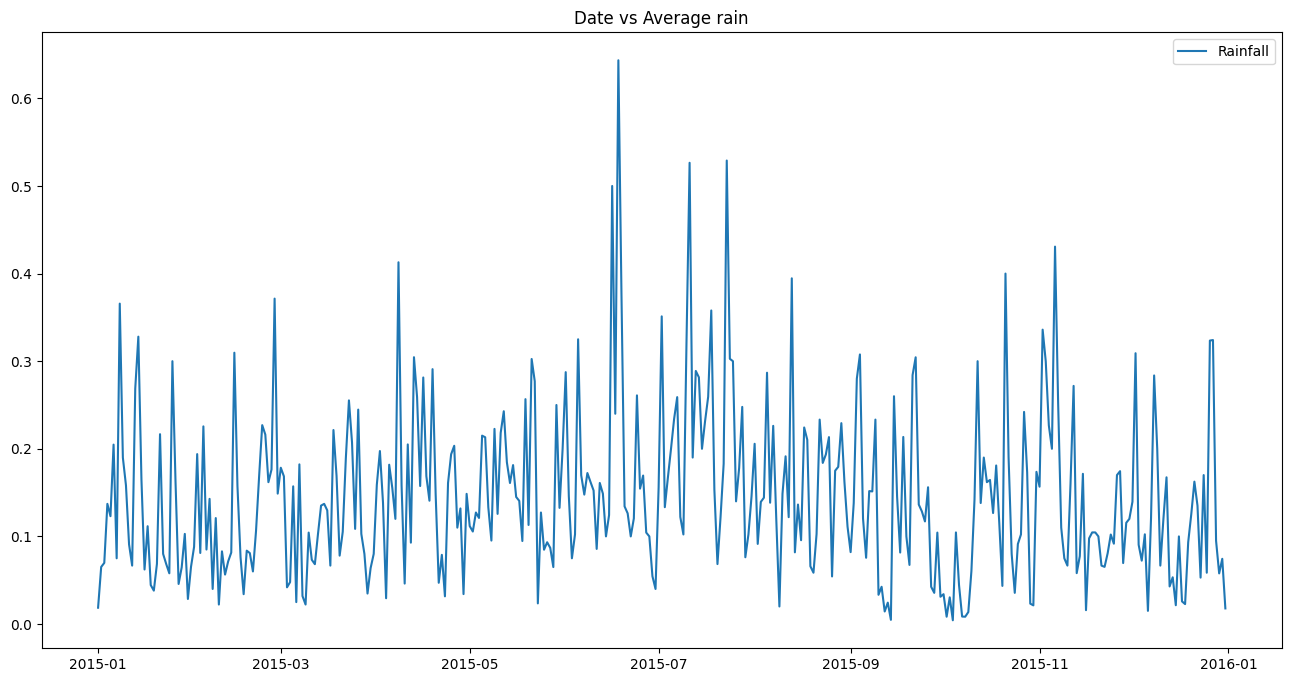

In [21]:
# Date vs RainTomorrow
df2 = df.copy()
df2['Date'] = pd.to_datetime(df2['Date'])
df2 = df2.sort_values(by='Date')

# convert 
colname = 'Rainfall'

IQR = df2[colname].quantile(0.75) - df2[colname].quantile(0.25)
df2 = df2[(df2[colname] < df2[colname].quantile(0.75) + 1.5 * IQR) & (df2[colname] > df2[colname].quantile(0.25) - 1.5 * IQR)]

df2 = df2[df2['Date'].dt.year == 2015]
df2 = df2.groupby('Date').mean([colname]).reset_index()

plt.figure(figsize=(16, 8))
plt.plot(df2['Date'], df2[colname])
plt.legend([colname])

plt.title('Date vs Average rain')
plt.show()



# Data Preprocessing

In [22]:
# impute missing values, replace with median for numerical columns and mode for categorical columns
df_imputed = df.copy()
for col in df.columns:
    if col in numerical_columns.columns:
        df_imputed[col] = df[col].fillna(df[col].median())
    else:
        df_imputed[col] = df[col].fillna(df[col].mode()[0])

# check if there are any missing values
df_imputed.isnull().sum().sum()


0

In [23]:
# Remove outliers from all numerical columns, put median in place of outliers
df_h = df_imputed.copy()
isoutlier = lambda df, q1, q3, iqr: (df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))
for col in numerical_columns.columns:
    q1 = df_h[col].quantile(0.25)
    q3 = df_h[col].quantile(0.75)
    iqr = q3 - q1
    # df_h.loc[(df_h[col] < (q1 - 1.5 * iqr)) | (df_h[col] > (q3 + 1.5 * iqr)), col] = df_h[col].median()
    df_h.loc[isoutlier(df_h[col], q1, q3, iqr), col] = df_h[col].median()

# check if there are any outliers
df_h[numerical_columns.columns].describe()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.199702,23.242571,0.083262,4.685395,8.412035,38.531438,13.639963,18.210209,69.462443,51.553396,1017.719602,1015.287983,4.659755,4.880888,17.000308,21.657845
std,6.349878,6.956465,0.248118,0.810064,0.181132,10.742247,8.153724,7.925050,18.004514,20.471345,6.157569,6.151755,2.281490,1.911427,6.385000,6.631455
min,-5.900000,2.800000,0.000000,2.200000,7.500000,9.000000,0.000000,0.000000,18.000000,0.000000,1001.100000,998.700000,0.000000,1.000000,-1.400000,2.500000
25%,7.700000,18.000000,0.000000,4.800000,8.400000,31.000000,7.000000,13.000000,58.000000,37.000000,1013.800000,1011.300000,3.000000,5.000000,12.400000,16.800000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.100000,0.000000,4.800000,8.400000,44.000000,19.000000,24.000000,83.000000,65.000000,1021.600000,1019.200000,6.000000,6.000000,21.500000,26.200000
max,30.300000,43.500000,1.500000,7.000000,9.400000,67.000000,37.000000,39.000000,100.000000,100.000000,1034.200000,1031.800000,9.000000,9.000000,35.300000,40.400000


In [24]:
# make date as year, month, day
df_h['Date'] = pd.to_datetime(df_h['Date'])
df_h['Year'] = df_h['Date'].dt.year
df_h['Month'] = df_h['Date'].dt.month
df_h['Day'] = df_h['Date'].dt.day

# drop date column
df_h = df_h.drop('Date', axis=1)


In [25]:
# convert categorical cat.codes
categorical_columns = df_h.select_dtypes(include=['object'])
for col in categorical_columns.columns:
    df_h[col] = df_h[col].astype('category')
    df_h[col] = df_h[col].cat.codes

df_h.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [26]:
# print unique values in categorical columns
for col in categorical_columns.columns:
    print(col, df_h[col].unique(), 'len =', len(df_h[col].unique()))


Location [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41] len = 49
WindGustDir [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11] len = 16
WindDir9am [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5] len = 16
WindDir3pm [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4] len = 16
RainToday [0 1] len = 2
RainTomorrow [0 1] len = 2


In [ ]:
!pip intall imblearn

In [27]:
# split then apply SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df_h.drop('RainTomorrow', axis=1)
y = df_h['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)




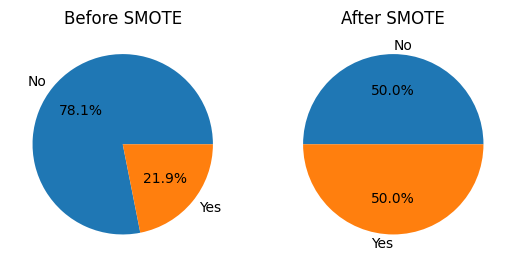

In [28]:
# check imbalance & draw pie chart for before and after SMOTE on the same plot

# plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
# plt.pie(y.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
y_train_df = pd.DataFrame(y_train)
plt.pie(y_train_df.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Before SMOTE')

plt.subplot(1, 2, 2)
# plt.pie(y_res.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
y_train_res_df = pd.DataFrame(y_train_res)
plt.pie(y_train_res_df.value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('After SMOTE')

plt.show()



# Model Building

In [29]:
# Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [30]:

StartTraining = True
# create a function to train and test models
def train_test_model(model, X_train, X_test, y_train, y_test):
    if not StartTraining:
        return
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Precision =', precision_score(y_test, y_pred))
    print('Recall =', recall_score(y_test, y_pred))
    print('F1 score =', f1_score(y_test, y_pred))
    print()


In [31]:

# Logistic Regression
print('Logistic Regression')
train_test_model(LogisticRegression(max_iter=2000), X_train_res, X_test, y_train_res, y_test)


Logistic Regression
Accuracy = 0.7682180668224942
Precision = 0.48394791770201767
Recall = 0.758411214953271
F1 score = 0.590862204963291



In [32]:

# Decision Tree
print('Decision Tree')
train_test_model(DecisionTreeClassifier(), X_train_res, X_test, y_train_res, y_test)


Decision Tree
Accuracy = 0.7690086621751684
Precision = 0.4794689296468656
Recall = 0.545638629283489
F1 score = 0.510418184467434



In [33]:

# Random Forest
print('Random Forest')
train_test_model(RandomForestClassifier(), X_train_res, X_test, y_train_res, y_test)


Random Forest
Accuracy = 0.8437371098583804
Precision = 0.6627866574009729
Recall = 0.5942367601246106
F1 score = 0.6266425755584757



In [34]:

# # SVM
# print('SVM')
# train_test_model(SVC(C=1.0, kernel='linear', gamma='auto'), X_train_res, X_test, y_train_res, y_test)


In [35]:

# KNN
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train_res) 
X_test2 = scaler.transform(X_test)

print('KNN - MinMaxScaler')
train_test_model(KNeighborsClassifier(), X_train2, X_test2, y_train_res, y_test)


KNN - MinMaxScaler
Accuracy = 0.7509624639076035
Precision = 0.4596419137070737
Recall = 0.7317757009345794
F1 score = 0.5646295294753921



In [36]:

# StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train_res)
X_test2 = scaler.transform(X_test)

print('KNN - StandardScaler')
train_test_model(KNeighborsClassifier(), X_train2, X_test2, y_train_res, y_test)


KNN - StandardScaler
Accuracy = 0.7521655437921078
Precision = 0.46139562157935887
Recall = 0.7353582554517134
F1 score = 0.5670189766994955



In [37]:


# Naive Bayes
print('Naive Bayes')
train_test_model(GaussianNB(), X_train_res, X_test, y_train_res, y_test)


Naive Bayes
Accuracy = 0.7262821394197717
Precision = 0.43238979931644905
Recall = 0.7685358255451713
F1 score = 0.5534182042510235



# Spark

In [38]:
X_train_res.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,14.5,17.8,0.0,4.8,8.4,13,39.0,3,9,...,1024.1,1022.5,8.0,5.0,16.2,21.1,1,2017,4,24
1,16,24.6,39.5,0.0,4.8,8.4,9,31.0,3,7,...,1011.8,1006.6,2.0,4.0,30.1,39.2,0,2013,10,11
2,19,14.7,26.6,0.2,3.2,8.0,10,30.0,12,8,...,1018.2,1015.4,7.0,3.0,17.3,24.5,0,2012,2,18
3,45,18.3,26.6,0.0,4.8,8.4,9,28.0,15,10,...,1017.0,1016.5,6.0,5.0,23.0,25.4,0,2012,2,18
4,0,11.4,19.3,0.6,2.4,8.9,13,31.0,12,11,...,1018.6,1017.1,5.0,5.0,14.4,18.3,0,2011,10,11


# loop over testpoints using spark (parallelize over testpoints)

In [39]:
def dist_many(arr, p, labels):
    """
    arr: array of training points
    p: testing point
    labels: array of labels
    """
    # return np.sqrt(np.sum((np.array(arr) - np.array(p))**2, axis=1))
    # return np.array(list(zip(list(labels), list(np.sqrt(np.sum((np.array(arr) - np.array(p))**2, axis=1))))))
    return list(zip(labels, np.sqrt(np.sum((np.array(arr) - np.array(p))**2, axis=1))))

print(dist_many(
    np.array([[1,2], [3,4], [5,6]]),
    np.array([4,7]),
    np.array([1,2,3])
))
print(np.sqrt(3**2+5**2), np.sqrt(1**2+3**2), np.sqrt(1**2+1**2))

[(1, 5.830951894845301), (2, 3.1622776601683795), (3, 1.4142135623730951)]
5.830951894845301 3.1622776601683795 1.4142135623730951


In [40]:
def f(x, K):
    """
    for each point, find k nearest neighbors, x=[(label1, distance1), (label2, distance2), ...]
    """
    x = np.array(x)
    x = x[x[:,1].argsort()]
    x = x[0:K]
    return x
def f2(x):
    """
    for each point, find the most common label, x=[(label1, distance1), (label2, distance2), ...]
    """
    x = np.array(x, dtype=int)
    return np.bincount(x[:,0]).argmax()
def classify_many(allpoints, testpoints , labels, K=1):
    """
    allpoints: np.array of training points
    testpoints: np.array of testing points
    labels: np.array of labels
    K: number of neighbors
    """
    distances = testpoints.map(lambda x: dist_many(allpoints, x, labels)) # [(label, distance), (label, distance), ...]

    k_nearest = distances.map(lambda x: f(x, K))

    labels_count1 = k_nearest.map(lambda x: f2(x))
    return labels_count1

In [ ]:
cur_test_data = sc.parallelize(X_test.values).map(lambda x: tuple(x))


In [ ]:
knn_predictions = classify_many(X_train_res.values, cur_test_data, y_train_res.values, K=5).collect()


In [ ]:
# accuracy
print('Accuracy =', accuracy_score(y_test, knn_predictions))
print('Precision =', precision_score(y_test, knn_predictions))
print('Recall =', recall_score(y_test, knn_predictions))
print('F1 score =', f1_score(y_test, knn_predictions))


In [43]:
allpoints = np.array([[1,2], [3,4], [5,6]])
testpoints = sc.parallelize([[4,7], [1,3]])
labels = np.array([1,2,1])
predictions = classify_many(allpoints, testpoints, labels, K=1).collect()
print(predictions)

distances = testpoints.map(lambda x: dist_many(allpoints, x, labels))
k_nearest = distances.map(lambda x: f(x, 1))
k_nearest.collect()

# labels_count1 = k_nearest.map(lambda x: (x[0][0], 1))#.reduceByKey(lambda x, y: x+y)
labels_count1 = k_nearest.map(lambda x: f2(x))
labels_count1.collect()

ERROR:root:KeyboardInterrupt while sending command.][Stage 2:>    (0 + 0) / 8]8]
Traceback (most recent call last):
  File "/home/akram/.local/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/akram/.local/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

# Loop over training samples (parallelize over training samples)

In [ ]:
def dist(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2))


In [ ]:
def classify(allpoints, point, K=1):
    # map phase
    distances = allpoints.map(lambda x: (None, (x[0], dist(x[1], point)))) # x[0]: label, x[1]: features
    # reduce phase
    k_nearest = distances.top(K, key=lambda x: -x[1][1]) # x[0]: None, x[1]: (label, distance), -x[1][1]: sort by distance
    # print(k_nearest)
    # map phase
    labels_count = sc.parallelize(k_nearest).map(lambda x: (x[1][0], 1))
    # reduce phase
    label = labels_count.reduceByKey(lambda x, y: x + y).top(1, key=lambda x: x[1])[0][0]
    return label

In [ ]:
allpoints = np.array([[1,2], [3,4], [5,6]])
labels = np.array([1,2,1])
point = np.array([4,7])
print(classify(sc.parallelize(list(zip(labels, allpoints))), point, K=1))
tmp = np.sqrt(np.sum((allpoints - point)**2, axis=1))
a = np.argmin(tmp)

print(labels[a])
print(tmp[a])

0
0
0.08392430483383606


In [ ]:
data = sc.parallelize(tuple(list(zip(y_train_res.copy().values, X_train_res.copy().values)))).map(lambda x: (x[0], tuple(x[1])))
test_data = sc.parallelize(tuple(list(zip(y_test.copy().values, X_test.copy().values)))).map(lambda x: (x[0], tuple(x[1])))

In [ ]:
# Too Slow
predictions = []
# predictions = test_data.map(lambda x: classify(data, x[1])).collect()
for point in test_data.collect():
    predictions.append(classify(data, point[1], K=5))
    if len(predictions) % 100 == 0:
        print(len(predictions))

predictions[:10]

# can we put nested loops in spark?

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType


In [ ]:
# convert classify to a user defined function
classify_udf = udf(classify, IntegerType())

In [ ]:
predictions = test_data.map(lambda x: (x[0], classify(data, x[1]))) # x[0]: label, x[1]: features
# predictions.take(5)

Traceback (most recent call last):
  File "/home/akram/.local/lib/python3.10/site-packages/pyspark/serializers.py", line 459, in dumps
    return cloudpickle.dumps(obj, pickle_protocol)
  File "/home/akram/.local/lib/python3.10/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 73, in dumps
    cp.dump(obj)
  File "/home/akram/.local/lib/python3.10/site-packages/pyspark/cloudpickle/cloudpickle_fast.py", line 632, in dump
    return Pickler.dump(self, obj)
  File "/home/akram/.local/lib/python3.10/site-packages/pyspark/context.py", line 462, in __getnewargs__
    raise RuntimeError(
RuntimeError: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.


PicklingError: Could not serialize object: RuntimeError: It appears that you are attempting to reference SparkContext from a broadcast variable, action, or transformation. SparkContext can only be used on the driver, not in code that it run on workers. For more information, see SPARK-5063.